In [1]:
# Process 14 iterations Coskun's data

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pylab as plt
import seaborn as sns
import statistics
from scipy.signal import butter, filtfilt, iirnotch

import tensorflow as tf 

from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LeakyReLU
from tensorflow.keras.layers import LSTM, Input, Conv1D
from tensorflow.keras.layers import Dropout, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam #from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.metrics import MeanAbsoluteError

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from scipy.stats import pearsonr


In [2]:
df_it1 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_EMG_C1.csv",header = None, sep='\t')
df_it2 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_EMG_C2.csv",header = None, sep='\t')
df_it3 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_EMG_C3.csv",header = None, sep='\t')
df_it4 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_EMG_C4.csv",header = None, sep='\t')
df_it5 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_EMG_C5.csv",header = None, sep='\t')
df_it6 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_EMG_C6.csv",header = None, sep='\t')
df_it7 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_EMG_C7.csv",header = None, sep='\t')
df_it8 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_EMG_C8.csv",header = None, sep='\t')
df_it9 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_EMG_C9.csv",header = None, sep='\t')
df_it10 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_EMG_C10.csv",header = None, sep='\t')

df_Ang1 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_Hand_C1.csv",header = None, sep='\t')
df_Ang2 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_Hand_C2.csv",header = None, sep='\t')
df_Ang3 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_Hand_C3.csv",header = None, sep='\t')
df_Ang4 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_Hand_C4.csv",header = None, sep='\t')
df_Ang5 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_Hand_C5.csv",header = None, sep='\t')
df_Ang6 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_Hand_C6.csv",header = None, sep='\t')
df_Ang7 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_Hand_C7.csv",header = None, sep='\t')
df_Ang8 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_Hand_C8.csv",header = None, sep='\t')
df_Ang9 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_Hand_C9.csv",header = None, sep='\t')
df_Ang10 = pd.read_csv("/Users/coskuntekes/Documents/MATLAB/ModelDeployment/ProcessedDataset_Aiden2/Processed_Hand_C10.csv",header = None, sep='\t')



In [3]:
# df_Ang1 = df_Ang1.iloc[:,2:]
# df_Ang2 = df_Ang2.iloc[:,2:]
# df_Ang3 = df_Ang3.iloc[:,2:]
# df_Ang4 = df_Ang4.iloc[:,2:]
# df_Ang5 = df_Ang5.iloc[:,2:]
# df_Ang6 = df_Ang6.iloc[:,2:]
# df_Ang7 = df_Ang7.iloc[:,2:]
# df_Ang8 = df_Ang8.iloc[:,2:]
# df_Ang9 = df_Ang9.iloc[:,2:]
# df_Ang10 = df_Ang10.iloc[:,2:]
# df_Ang11 = df_Ang11.iloc[:,2:]
# df_Ang12 = df_Ang12.iloc[:,2:]
# df_Ang13 = df_Ang13.iloc[:,2:]
# df_Ang14 = df_Ang14.iloc[:,2:]

df_Ang1.shape

# plt.plot(df_Ang1m.iloc[:,0])

(14378, 1)

In [4]:

def bandpass_filter(signal, fs=500, low=20, high=180, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [low/nyq, high/nyq], btype='band')
    return filtfilt(b, a, signal, axis=0)

In [9]:
def rectified_data(signal):
    return np.abs(signal)

In [ ]:
def envelope_data(signal):
    window = int(0.05 * 500)  # 100 ms window
    signalEnvelope = np.zeros(signal.shape)
    for i in range(8):
        signalEnvelope[:,i] = np.convolve(signal[:,i], np.ones(window)/window, mode='same')
    return signalEnvelope

In [ ]:
emg_data1 = bandpass_filter(df_it1)
emg_data2 = bandpass_filter(df_it2)
emg_data3 = bandpass_filter(df_it3)
emg_data4 = bandpass_filter(df_it4)
emg_data5 = bandpass_filter(df_it5)
emg_data6 = bandpass_filter(df_it6)
emg_data7 = bandpass_filter(df_it7)
emg_data8 = bandpass_filter(df_it8)
emg_data9 = bandpass_filter(df_it9)
emg_data10 = bandpass_filter(df_it10)

emg_data1 = rectified_data(emg_data1)
emg_data2 = rectified_data(emg_data2)
emg_data3 = rectified_data(emg_data3)
emg_data4 = rectified_data(emg_data4)
emg_data5 = rectified_data(emg_data5)
emg_data6 = rectified_data(emg_data6)
emg_data7 = rectified_data(emg_data7)
emg_data8 = rectified_data(emg_data8)
emg_data9 = rectified_data(emg_data9)
emg_data10 = rectified_data(emg_data10)

emg_data1.shape

(14378, 8)

In [8]:
type(df_it1)

pandas.core.frame.DataFrame

(12563, 8)


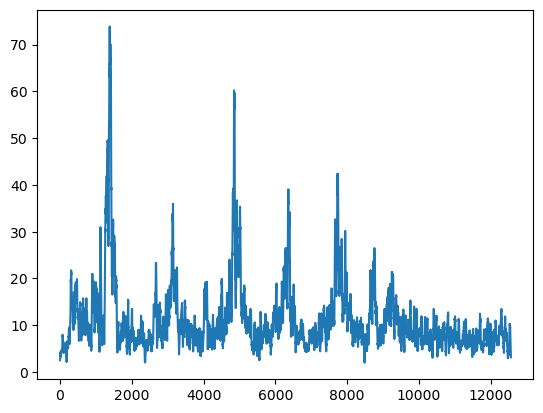

In [ ]:

emg_data1 = envelope_data(emg_data1)
emg_data2 = envelope_data(emg_data2)
emg_data3 = envelope_data(emg_data3)
emg_data4 = envelope_data(emg_data4)
emg_data5 = envelope_data(emg_data5)
emg_data6 = envelope_data(emg_data6)
emg_data7 = envelope_data(emg_data7)
emg_data8 = envelope_data(emg_data8)
emg_data9 = envelope_data(emg_data9)
emg_data10 = envelope_data(emg_data10)

print(emg_data1.shape)
plt.plot(emg_data1[:,0])

In [ ]:

# emgScaled6 = np.abs(df_it6)
# emgScaled7 = np.abs(df_it7)
# emgScaled8 = np.abs(df_it8)
# emgScaled9 = np.abs(df_it9)
# emgScaled10 = np.abs(df_it10)
# emgScaled11 = np.abs(df_it11)
# emgScaled12 = np.abs(df_it12)
# emgScaled13 = np.abs(df_it13)
# emgScaled14 = np.abs(df_it14)



scaler = StandardScaler()   # MinMaxScaler()  #
emgScaled1 = scaler.fit_transform(emg_data1)
emgScaled2 = scaler.fit_transform(emg_data2)
emgScaled3 = scaler.fit_transform(emg_data3)
emgScaled4 = scaler.fit_transform(emg_data4)
emgScaled5 = scaler.fit_transform(emg_data5)
emgScaled6 = scaler.fit_transform(emg_data6)
emgScaled7 = scaler.fit_transform(emg_data7)
emgScaled8 = scaler.fit_transform(emg_data8)
emgScaled9 = scaler.fit_transform(emg_data9)
emgScaled10 = scaler.fit_transform(emg_data10)

angScaled1 = scaler.fit_transform(df_Ang1)
angScaled2 = scaler.fit_transform(df_Ang2)
angScaled3 = scaler.fit_transform(df_Ang3)
angScaled4 = scaler.fit_transform(df_Ang4)
angScaled5 = scaler.fit_transform(df_Ang5)
angScaled6 = scaler.fit_transform(df_Ang6)
angScaled7 = scaler.fit_transform(df_Ang7)
angScaled8 = scaler.fit_transform(df_Ang8)
angScaled9 = scaler.fit_transform(df_Ang9)
angScaled10 = scaler.fit_transform(df_Ang10)



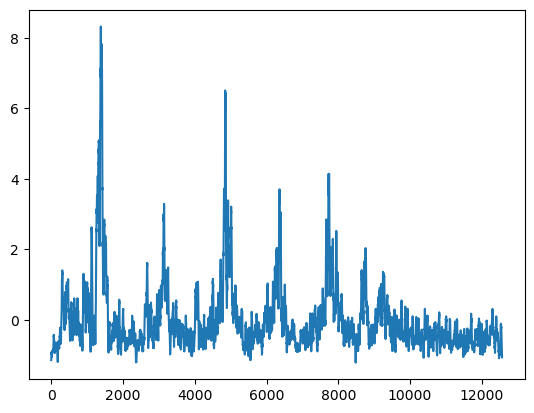

In [162]:
plt.plot(emgScaled1[:,0])
# plt.plot(df_it11.iloc[:,4])
# type(emgScaled1)

In [163]:
window_size = 100
step = 10
X, y = [], []
for i in range(0, len(emgScaled1) - window_size, step):
    X.append(emgScaled1[i:i + window_size])
    y.append(angScaled1[i + window_size // 2])

for i in range(0, len(emgScaled2) - window_size, step):
    X.append(emgScaled2[i:i + window_size])
    y.append(angScaled2[i + window_size // 2])

for i in range(0, len(emgScaled3) - window_size, step):
    X.append(emgScaled3[i:i + window_size])
    y.append(angScaled3[i + window_size // 2])

for i in range(0, len(emgScaled4) - window_size, step):
    X.append(emgScaled4[i:i + window_size])
    y.append(angScaled4[i + window_size // 2])

# for i in range(0, len(emgScaled5) - window_size, step):
#     X.append(emgScaled5[i:i + window_size])
#     y.append(angScaled5[i + window_size // 2])

# for i in range(0, len(emgScaled6) - window_size, step):
#     X.append(emgScaled6[i:i + window_size])
#     y.append(angScaled6[i + window_size // 2])

# for i in range(0, len(emgScaled7) - window_size, step):
#     X.append(emgScaled7[i:i + window_size])
#     y.append(angScaled7[i + window_size // 2])

# for i in range(0, len(emgScaled8) - window_size, step):
#     X.append(emgScaled8[i:i + window_size])
#     y.append(angScaled8[i + window_size // 2])

# for i in range(0, len(emgScaled9) - window_size, step):
#     X.append(emgScaled9[i:i + window_size])
#     y.append(angScaled9[i + window_size // 2])

# for i in range(0, len(emgScaled10) - window_size, step):
#     X.append(emgScaled10[i:i + window_size])
#     y.append(angScaled10[i + window_size // 2])

# for i in range(0, len(emgScaled11) - window_size, step):
#     X.append(emgScaled11[i:i + window_size])
#     y.append(angScaled11[i + window_size // 2])

# for i in range(0, len(emgScaled12) - window_size, step):
#     X.append(emgScaled12[i:i + window_size])
#     y.append(angScaled12[i + window_size // 2])

# for i in range(0, len(emgScaled13) - window_size, step):
#     X.append(emgScaled13[i:i + window_size])
#     y.append(angScaled13[i + window_size // 2])


        

In [164]:
# Xv, yv = [], []

# for i in range(0, len(emgScaled5) - window_size, step):
#     Xv.append(emgScaled5[i:i + window_size])
#     yv.append(angScaled5[i + window_size // 2])


In [165]:
X = np.array(X)
y = np.array(y)

# Xv = np.array(Xv)
# yv = np.array(yv)

print(X.shape)
print(y.shape)

(4487, 100, 8)
(4487, 1)


In [166]:
X_train, y_train = shuffle(X, y, random_state=42)
# X_val, y_val = shuffle(Xv, yv, random_state=42)

In [167]:
X_train = np.array(X_train)
y_train = np.array(y_train)
# X_val = np.array(X_val)
# y_val = np.array(y_val)

print(X_train.shape)
print(y_train.shape)

(4487, 100, 8)
(4487, 1)


In [168]:
input_layer = Input(shape=(window_size, 8))

x = Conv1D(64, kernel_size=11, activation='relu', padding='same')(input_layer)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Conv1D(128, kernel_size=9, activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling1D(pool_size=2)(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

output_layer = Dense(1, activation='linear')(x)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=1e-3), loss='mse', metrics=[MeanAbsoluteError()])

In [169]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
141/141 [==============================] - 1s 7ms/step - loss: 3.3113 - mean_absolute_error: 1.3688
Epoch 2/100
141/141 [==============================] - 1s 7ms/step - loss: 0.9610 - mean_absolute_error: 0.7741
Epoch 3/100
141/141 [==============================] - 1s 7ms/step - loss: 0.7629 - mean_absolute_error: 0.6858
Epoch 4/100
141/141 [==============================] - 1s 8ms/step - loss: 0.7003 - mean_absolute_error: 0.6554
Epoch 5/100
141/141 [==============================] - 1s 8ms/step - loss: 0.6370 - mean_absolute_error: 0.6245
Epoch 6/100
141/141 [==============================] - 1s 7ms/step - loss: 0.5906 - mean_absolute_error: 0.5985
Epoch 7/100
141/141 [==============================] - 1s 6ms/step - loss: 0.5643 - mean_absolute_error: 0.5884
Epoch 8/100
141/141 [==============================] - 1s 6ms/step - loss: 0.5163 - mean_absolute_error: 0.5611
Epoch 9/100
141/141 [==============================] - 1s 6ms/step - loss: 0.4781 - mean_absolute_error:

In [170]:
Xt=[]
yt=[]
for i in range(0, len(emgScaled5) - window_size, window_size):
    Xt.append(emgScaled5[i:i + window_size])
    yt.append(angScaled5[i + window_size // 2])

In [171]:
X_test = np.array(Xt)
y_test = np.array(yt)
print(X_test.shape)
print(y_test.shape)

(143, 100, 8)
(143, 1)


In [172]:
y_pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [173]:
y_pred.shape

(143, 1)

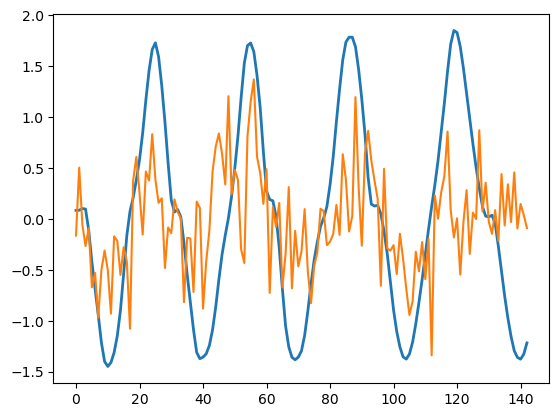

In [174]:
plt.plot(y_test[:, 0], label='Actual', linewidth=2)
plt.plot(y_pred[:, 0], label='Predicted')

In [175]:


print("\n📊 Output-wise R² and Pearson r:")
for i in range(y_test.shape[1]):
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    r, _ = pearsonr(y_test[:, i], y_pred[:, i])
    print(f"  Output {i}: R² = {r2:.4f}, r = {r:.4f}")



📊 Output-wise R² and Pearson r:
  Output 0: R² = 0.1876, r = 0.4375
